In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import re
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
data = files.upload()

Saving Keyword_data - Keyword_data.csv to Keyword_data - Keyword_data.csv


In [3]:
df = pd.read_csv('Keyword_data - Keyword_data.csv')
df

,Title,Keyword 1,Keyword 2,Keyword 3,Keyword 4,Keyword 5,Keyword 6,Keyword 7,Keyword 8,Keyword 9,Keyword 10,Keyword 11,Keyword 12
0,Feb/03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Meta-Analyses of Financial Performance and Equ...,EQUITY,ORGANIZATIONAL sociology,PERFORMANCE,META-analysis,PSYCHOMETRICS,ORGANIZATIONAL research,FINANCIAL performance,AGENCY theory,ORGANIZATIONAL effectiveness,ORGANIZATIONAL behavior,CORPORATE governance,NaN
3,"Home Country Environments, Corporate Diversifi...",DIVERSIFICATION in industry,BUSINESS planning,PERFORMANCE standards,EMPLOYEES -- Rating of,CORPORATE culture,STRATEGIC planning,ORGANIZATIONAL effectiveness,MANAGEMENT science,MANAGEMENT research,PRODUCT management,NaN,NaN
4,Safeguarding Investments in Asymmetric Interor...,INTERORGANIZATIONAL relations,INTERGROUP relations,BUSINESS communication,INVESTMENTS,SUPPLY chains,KNOWLEDGE management,INTERORGANIZATIONAL networks,CORPORATE governance,GROUP decision making,INTELLECTUAL capital,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Subsidiary Staffing in Multinational Enterpris...,INTERNATIONAL business enterprises -- Management,FOREIGN subsidiaries -- Management,EMPLOYEE selection,EXECUTIVES -- Recruiting,ORGANIZATIONAL sociology,ORGANIZATIONAL behavior,AGENCY theory,RESOURCE-based theory of the firm,PERSONNEL management,EMPLOYMENT in foreign countries,SUBSIDIARY corporations -- Management,HOST countries (Business)
62,"Strategic Human Resource Practices, Top Manage...",PERSONNEL management,COMPETITIVE advantage,BUSINESS networks,INDUSTRIAL management,STRATEGIC planning,SOCIAL networks,RESOURCE management,RESOURCE-based theory of the firm,HUMAN capital -- Management,INTELLECTUAL capital,DECISION making,INDUSTRIAL efficiency
63,Compensation Policy and Organizational Perform...,COMPENSATION management,ORGANIZATIONAL behavior,PERSONNEL management,HOSPITALS -- Administration,MANAGEMENT,FINANCIAL performance,WAGE payment systems,RESOURCE management,ORGANIZATIONAL effectiveness,INDUSTRIAL efficiency,FINANCIAL management,INDUSTRIAL management
64,"Functional Background Identity, Diversity, and...",CROSS-functional teams,TEAMS in the workplace,GROUP identity,ORGANIZATIONAL behavior,MANAGEMENT,PERFORMANCE,PERSONNEL management,COMPETITIVE advantage,ORGANIZATIONAL effectiveness,GROUP decision making,ORGANIZATIONAL structure,ORGANIZATIONAL sociology


In [4]:
df.head()

,Title,Keyword 1,Keyword 2,Keyword 3,Keyword 4,Keyword 5,Keyword 6,Keyword 7,Keyword 8,Keyword 9,Keyword 10,Keyword 11,Keyword 12
0,Feb/03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Meta-Analyses of Financial Performance and Equ...,EQUITY,ORGANIZATIONAL sociology,PERFORMANCE,META-analysis,PSYCHOMETRICS,ORGANIZATIONAL research,FINANCIAL performance,AGENCY theory,ORGANIZATIONAL effectiveness,ORGANIZATIONAL behavior,CORPORATE governance,NaN
3,"Home Country Environments, Corporate Diversifi...",DIVERSIFICATION in industry,BUSINESS planning,PERFORMANCE standards,EMPLOYEES -- Rating of,CORPORATE culture,STRATEGIC planning,ORGANIZATIONAL effectiveness,MANAGEMENT science,MANAGEMENT research,PRODUCT management,NaN,NaN
4,Safeguarding Investments in Asymmetric Interor...,INTERORGANIZATIONAL relations,INTERGROUP relations,BUSINESS communication,INVESTMENTS,SUPPLY chains,KNOWLEDGE management,INTERORGANIZATIONAL networks,CORPORATE governance,GROUP decision making,INTELLECTUAL capital,NaN,NaN


In [5]:
df.dropna( how = 'all', inplace = True)
df

,Title,Keyword 1,Keyword 2,Keyword 3,Keyword 4,Keyword 5,Keyword 6,Keyword 7,Keyword 8,Keyword 9,Keyword 10,Keyword 11,Keyword 12
0,Feb/03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Meta-Analyses of Financial Performance and Equ...,EQUITY,ORGANIZATIONAL sociology,PERFORMANCE,META-analysis,PSYCHOMETRICS,ORGANIZATIONAL research,FINANCIAL performance,AGENCY theory,ORGANIZATIONAL effectiveness,ORGANIZATIONAL behavior,CORPORATE governance,NaN
3,"Home Country Environments, Corporate Diversifi...",DIVERSIFICATION in industry,BUSINESS planning,PERFORMANCE standards,EMPLOYEES -- Rating of,CORPORATE culture,STRATEGIC planning,ORGANIZATIONAL effectiveness,MANAGEMENT science,MANAGEMENT research,PRODUCT management,NaN,NaN
4,Safeguarding Investments in Asymmetric Interor...,INTERORGANIZATIONAL relations,INTERGROUP relations,BUSINESS communication,INVESTMENTS,SUPPLY chains,KNOWLEDGE management,INTERORGANIZATIONAL networks,CORPORATE governance,GROUP decision making,INTELLECTUAL capital,NaN,NaN
5,Managerialist and Human Capital Explanations f...,EXECUTIVE compensation,WAGES,HUMAN capital,LABOR economics,PERSONNEL management,MANAGEMENT science,CONTINGENCY theory (Management),COMPENSATION management,EXECUTIVE ability (Management),CORPORATE governance,NaN,NaN
6,Bidding Wars Over R&D-Intensive Firms: Knowled...,KNOWLEDGE management,INFORMATION resources management,MANAGEMENT information systems,BREAK-even analysis,DATA mining,MANAGEMENT science,RESEARCH & development,RESEARCH & development contracts,CORPORATE governance,DECISION making,ORGANIZATIONAL behavior,TRANSACTION costs
7,When “The Show Must Go On”: Surface Acting and...,EMOTIONS (Psychology),INTERPERSONAL relations,STRESS (Psychology),SOCIAL interaction,SOCIAL psychology,EMPLOYEES -- Attitudes,CUSTOMER services,CUSTOMER satisfaction,JOB stress,PEER review (Professional performance),NaN,NaN
8,Relationships among Supervisors' and Subordina...,SUPERVISORS,JUSTICE,CONFLICT management,MEDIATION,EMPLOYEES,INDUSTRIAL relations,ORGANIZATIONAL behavior,UNITED States -- National Guard,ORGANIZATIONAL effectiveness,DECISION making,RESOURCE allocation,NaN
9,Punctuated Equilibrium and Linear Progression:...,INDUSTRIAL relations,MANAGEMENT science,DECISION theory,ORGANIZATIONAL sociology,PUNCTUATED equilibrium (Evolution),ORGANIZATIONAL change,ORGANIZATIONAL behavior,ORGANIZATIONAL structure,BUSINESS models,ORGANIZATIONAL research,NaN,NaN
11,Apr/03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
csv_dict = df.set_index('Title').T.to_dict('list')


In [7]:
csv_dict

{'A Behavioral Theory of R&D Expenditures and Innovations: Evidence from Shipbuilding': ['ORGANIZATIONAL behavior',
  'CORPORATIONS -- Finance',
  'RESEARCH & development',
  'INDUSTRIAL management',
  'INNOVATIONS in business',
  'INNOVATION management',
  'BUSINESS planning',
  'SHIPBUILDING industry',
  'TECHNOLOGICAL innovations -- Economic aspects',
  'SUCCESS in business',
  'COMPETITIVE advantage',
  'ORGANIZATIONAL change'],
 'A Customer Interaction Approach to Strategy and Production Complexity Alignment in Service Firms': ['SERVICE industries -- Management',
  'CUSTOMER relations',
  'INDUSTRIAL management',
  'PRODUCTION management',
  'STRATEGIC planning',
  'CUSTOMER services',
  'LABOR process',
  'ORGANIZATIONAL behavior',
  'DECISION making',
  'CUSTOMER satisfaction',
  'CUSTOMER orientation',
  'MARKETING strategy'],
 'A Social Capital Model of High-Growth Ventures': ['SOCIAL capital (Sociology)',
  'INFRASTRUCTURE (Economics)',
  'VENTURE capital',
  'INVESTMENTS',
 

In [9]:
keywords = df.iloc[:,1:]
keywords

,Keyword 1,Keyword 2,Keyword 3,Keyword 4,Keyword 5,Keyword 6,Keyword 7,Keyword 8,Keyword 9,Keyword 10,Keyword 11,Keyword 12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EQUITY,ORGANIZATIONAL sociology,PERFORMANCE,META-analysis,PSYCHOMETRICS,ORGANIZATIONAL research,FINANCIAL performance,AGENCY theory,ORGANIZATIONAL effectiveness,ORGANIZATIONAL behavior,CORPORATE governance,NaN
3,DIVERSIFICATION in industry,BUSINESS planning,PERFORMANCE standards,EMPLOYEES -- Rating of,CORPORATE culture,STRATEGIC planning,ORGANIZATIONAL effectiveness,MANAGEMENT science,MANAGEMENT research,PRODUCT management,NaN,NaN
4,INTERORGANIZATIONAL relations,INTERGROUP relations,BUSINESS communication,INVESTMENTS,SUPPLY chains,KNOWLEDGE management,INTERORGANIZATIONAL networks,CORPORATE governance,GROUP decision making,INTELLECTUAL capital,NaN,NaN
5,EXECUTIVE compensation,WAGES,HUMAN capital,LABOR economics,PERSONNEL management,MANAGEMENT science,CONTINGENCY theory (Management),COMPENSATION management,EXECUTIVE ability (Management),CORPORATE governance,NaN,NaN
6,KNOWLEDGE management,INFORMATION resources management,MANAGEMENT information systems,BREAK-even analysis,DATA mining,MANAGEMENT science,RESEARCH & development,RESEARCH & development contracts,CORPORATE governance,DECISION making,ORGANIZATIONAL behavior,TRANSACTION costs
7,EMOTIONS (Psychology),INTERPERSONAL relations,STRESS (Psychology),SOCIAL interaction,SOCIAL psychology,EMPLOYEES -- Attitudes,CUSTOMER services,CUSTOMER satisfaction,JOB stress,PEER review (Professional performance),NaN,NaN
8,SUPERVISORS,JUSTICE,CONFLICT management,MEDIATION,EMPLOYEES,INDUSTRIAL relations,ORGANIZATIONAL behavior,UNITED States -- National Guard,ORGANIZATIONAL effectiveness,DECISION making,RESOURCE allocation,NaN
9,INDUSTRIAL relations,MANAGEMENT science,DECISION theory,ORGANIZATIONAL sociology,PUNCTUATED equilibrium (Evolution),ORGANIZATIONAL change,ORGANIZATIONAL behavior,ORGANIZATIONAL structure,BUSINESS models,ORGANIZATIONAL research,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
unique = []
for col in df.iloc[:,1:]:
  for keyword in df.iloc[:,1:][col].dropna():
    if keyword not in unique:
      unique.append(keyword)

In [11]:
len(unique)

248

In [12]:
mat = np.zeros((len(unique), len(unique)), dtype = int)

In [13]:
mat.shape

(248, 248)

In [14]:
for i in range(0, 248):
  for j in range(0, 248):
    if i != j :
      if (mat[i][j] == 0) and (mat[j][i] == 0) :
        for title in csv_dict.keys():
          if (unique[i] in (csv_dict[title])) and (unique[j] in (csv_dict[title])):
            mat[i][j] = mat[i][j] + 1
            mat[j][i] = mat[j][i] + 1 


In [17]:
mat

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [18]:
net = nx.from_numpy_matrix(mat, parallel_edges=False)

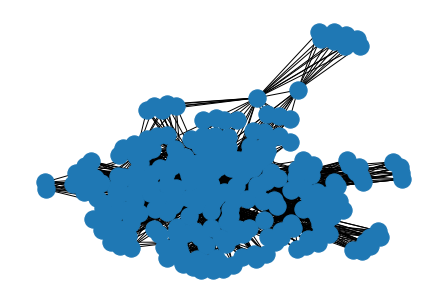

In [26]:
nx.draw(net)

In [27]:
def results(net):
  print("Nodes ",net.number_of_nodes() )
  print("Edges ",net.number_of_edges() )
  print("network info  ", net)
  print('Degree', net.degree())
  print("weighted degree", net.degree(weight='weight'))


In [28]:
def add_degree(data):
  df_degree = pd.DataFrame(data, columns=['Nodes', 'Degree'])
  df_degree['Keywords'] = unique
  return df_degree

In [29]:
def add_strength(data):
  df_strength = pd.DataFrame(data, columns=['Nodes', 'Strength'])
  df_strength['Keywords'] = unique
  return df_strength


In [30]:
def addweights(df_strength, mat):
  lis = []
  for i in range(0,248):
    for j in range(0,248):
      lis.append([df_strength['Keywords'][i], df_strength['Keywords'][j], mat[i][j]])
  df1 = pd.DataFrame(lis, columns =['key1', 'key2', 'weight'], dtype = float) 
  return df1

In [31]:
def plot(df_degree,df_strength):
  final_df = pd.merge(df_degree,df_strength,how="inner",on=['Nodes'])
  final_df = final_df[['Degree','Strength']].groupby('Degree').mean().reset_index()
  plt.plot(final_df['Degree'], final_df['Strength'])
  plt.xlabel('Degree')
  plt.ylabel('Strength')
  plt.title('Degree vs Strength')

In [32]:
results(net)

Nodes  248
Edges  2141
network info   Graph with 248 nodes and 2141 edges
Degree [(0, 10), (1, 18), (2, 24), (3, 31), (4, 19), (5, 9), (6, 10), (7, 49), (8, 90), (9, 62), (10, 14), (11, 16), (12, 20), (13, 42), (14, 14), (15, 16), (16, 102), (17, 18), (18, 32), (19, 11), (20, 93), (21, 24), (22, 9), (23, 166), (24, 26), (25, 31), (26, 55), (27, 9), (28, 31), (29, 9), (30, 17), (31, 9), (32, 35), (33, 48), (34, 15), (35, 26), (36, 11), (37, 19), (38, 11), (39, 11), (40, 66), (41, 29), (42, 16), (43, 17), (44, 11), (45, 32), (46, 10), (47, 64), (48, 16), (49, 10), (50, 25), (51, 23), (52, 9), (53, 17), (54, 11), (55, 18), (56, 20), (57, 9), (58, 9), (59, 9), (60, 9), (61, 9), (62, 46), (63, 9), (64, 9), (65, 7), (66, 9), (67, 28), (68, 11), (69, 37), (70, 11), (71, 9), (72, 9), (73, 11), (74, 9), (75, 10), (76, 9), (77, 10), (78, 10), (79, 17), (80, 9), (81, 29), (82, 10), (83, 37), (84, 10), (85, 9), (86, 16), (87, 9), (88, 66), (89, 10), (90, 9), (91, 9), (92, 9), (93, 9), (94, 17), (9

In [33]:
df1 =  add_degree(net.degree)
df1.sort_values(by = ['Degree'], ascending= False).head(10)
   

,Nodes,Degree,Keywords
23,23,166,ORGANIZATIONAL behavior
112,112,104,ORGANIZATIONAL effectiveness
16,16,102,MANAGEMENT science
20,20,93,PERSONNEL management
8,8,90,DECISION making
156,156,74,ORGANIZATIONAL structure
40,40,66,ORGANIZATIONAL sociology
88,88,66,STRATEGIC planning
47,47,64,INDUSTRIAL management
9,9,62,CORPORATE governance


In [34]:
df_str = add_strength(net.degree(weight='weight'))
df_str.sort_values(by = ['Strength'], ascending= False).head(10)
   

,Nodes,Strength,Keywords
23,23,265,ORGANIZATIONAL behavior
112,112,144,ORGANIZATIONAL effectiveness
16,16,136,MANAGEMENT science
20,20,126,PERSONNEL management
8,8,112,DECISION making
156,156,107,ORGANIZATIONAL structure
40,40,96,ORGANIZATIONAL sociology
9,9,85,CORPORATE governance
47,47,84,INDUSTRIAL management
88,88,80,STRATEGIC planning


In [35]:
dfw= addweights(df_str, mat)
dfw.sort_values(by = ['weight'], ascending= False).head(10)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  """Entry point for launching an IPython kernel.


,key1,key2,weight
5816,ORGANIZATIONAL behavior,ORGANIZATIONAL effectiveness,11.0
27799,ORGANIZATIONAL effectiveness,ORGANIZATIONAL behavior,11.0
5860,ORGANIZATIONAL behavior,ORGANIZATIONAL structure,9.0
38711,ORGANIZATIONAL structure,ORGANIZATIONAL behavior,9.0
5724,ORGANIZATIONAL behavior,PERSONNEL management,8.0
4983,PERSONNEL management,ORGANIZATIONAL behavior,8.0
3991,MANAGEMENT science,ORGANIZATIONAL behavior,7.0
5720,ORGANIZATIONAL behavior,MANAGEMENT science,7.0
2007,DECISION making,ORGANIZATIONAL behavior,6.0
5744,ORGANIZATIONAL behavior,ORGANIZATIONAL sociology,6.0


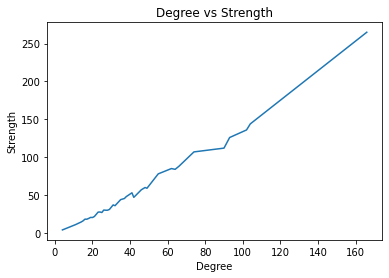

In [36]:
plot(df1, df_str)